<a href="https://colab.research.google.com/github/sahupra1357/CPE695AML/blob/main/HW4/Pradeep_Sahu_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#In this programming problem, you will get familiar with building a neural network using backpropagation. You are supposed to implement the following steps:  
# **Step 1**: use our “titanic” dataset in homework 3, and split data in the same way you did in homework 3 – 80% as training and 20% test sets;

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Titanic.csv to Titanic.csv


In [3]:
!ls

sample_data  Titanic.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydotplus
from IPython.display import Image 

In [5]:
pd.set_option('mode.chained_assignment', None)
data = pd.read_csv("Titanic.csv")
df = data.drop(data.columns[[0]],axis=1)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [7]:
df['age'].fillna(value=df['age'].mean(), inplace=True)

In [8]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['age']] = sc.fit_transform(df[['age']])

In [10]:
X = df[["pclass","sex","age","sibsp"]]

In [11]:
Y = df[["survived"]]

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X['pclass'] = le.fit_transform(X['pclass'])

X['sex'] = le.fit_transform(X['sex'])

In [13]:
X.head()

,pclass,sex,age,sibsp
0,0,0,-0.068420,0
1,0,1,-2.249092,1
2,0,0,-2.164974,1
3,0,1,0.009230,1
4,0,0,-0.379021,1


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

**Step 2**: Fit a neural network using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Fill in n/a attributes with the average of the same attributes from other training examples. Use 2 hidden layers and set the activation functions for both the hidden and output layer to be the sigmoid function. Set “solver” parameter as either SGD (stochastic gradient descend) or Adam (similar to SGD but optimized performance with mini batches). You can adjust parameter “alpha” for regularization (to control overfitting) and other parameters such as “learning rate” and “momentum” as needed.

# **Option 1**: use scikit-learn library;

In [15]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

In [16]:
#Fitting the training data to the network
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [17]:
#Predicting y for X_test
y_pred = classifier.predict(X_test)

In [18]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_test
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[139   5]
 [ 59  59]]


In [42]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,ConfusionMatrixDisplay
print("Testing Accuracy:{:.5f}".format(classifier.score(X_test,y_test)))

Testing Accuracy:0.75573


**Step 3**: Check the performance of the model with out-of- sample accuracy, defined as
out-of-sample percent survivors correctly predicted (on test set)
out-of-sample percent fatalities correctly predicted (on test set)
Please try two different network structures (i.e., number of neurons at each hidden layer) and show their respective accuracy.

In [43]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Percent Survivors Correctly Predicted:\t', 100*(tp / (tp + fn)), '%')
print('Percent Fatalities Correctly Predicted:\t', 100*(tn / (tn + fp)), '%')
print('Overall Accuracy:\t\t', 100*accuracy_score(y_test,y_pred), '%\n')
#plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues,  display_labels = ['Did Not Survive', 'Survived'],values_format='d')
#plt.show()

Percent Survivors Correctly Predicted:	 50.0 %
Percent Fatalities Correctly Predicted:	 96.52777777777779 %
Overall Accuracy:		 75.57251908396947 %



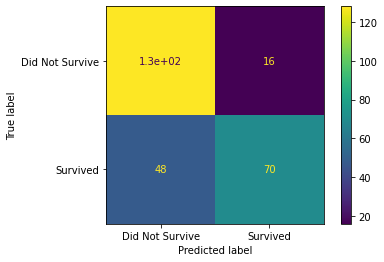

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Did Not Survive', 'Survived'])
disp.plot()
plt.show()

# **Option 2** (bonus: 2 points): implement backpropagation yourself

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [47]:
def forward_propagation(X, parameters):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    
    # LINEAR -> SIGMOID -> LINEAR -> SIGMOID -> LINEAR -> SIGMOID
    z1 = np.dot(W1, X) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    return a3, cache

In [48]:
def backward_propagation(X, Y, cache):

    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims=True)

    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims=True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims=True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

In [49]:
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2 # number of layers in the neural networks

    for k in range(L):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
    return parameters

In [50]:
def compute_loss(a3, Y):
    m = Y.shape[1]
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    loss = 1./m * np.nansum(logprobs)

    return loss

In [51]:
def predict(X, y, parameters):
  
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    
    # Forward propagation
    a3, caches = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    # print results
    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
    return p

In [52]:
def initialize_parameters_random(layers_dims):
    np.random.seed(3)               
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*10
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))

    return parameters

In [53]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True):
    grads = {}
    costs = [] 
    m = X.shape[1] 

    layers_dims = [X.shape[0], 10, 5, 1]
    parameters = initialize_parameters_random(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> SIGMOID -> LINEAR -> SIGMOID -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [54]:
X2_train = X_train.T.to_numpy()
y2_train = y_train.T.to_numpy()
X2_test = X_test.T.to_numpy()
y2_test = y_test.T.to_numpy()

Cost after iteration 0: 3.3741151822016215


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Cost after iteration 1000: 1.1903851511581558
Cost after iteration 2000: 0.7772159532635805
Cost after iteration 3000: 0.7045904572920568
Cost after iteration 4000: 0.624421407283334
Cost after iteration 5000: 0.5995169479833324
Cost after iteration 6000: 0.5861321807133818
Cost after iteration 7000: 0.5955544340947225
Cost after iteration 8000: 0.6216237965859425
Cost after iteration 9000: 0.6821921410219121
Cost after iteration 10000: 0.6487170801510709
Cost after iteration 11000: 0.5457197395823178
Cost after iteration 12000: 0.5153011990773605
Cost after iteration 13000: 0.49535144017986094
Cost after iteration 14000: 0.4931894845300178


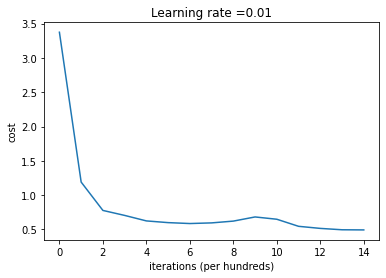

On the train set:
Accuracy: 0.7936962750716332
On the test set:
Accuracy: 0.7633587786259542


In [33]:
parameters = model(X2_train, y2_train)
print ("On the train set:")
predictions_train = predict(X2_train, y2_train, parameters)
print ("On the test set:")
predictions_test = predict(X2_test, y2_test, parameters)

In [34]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
#Comparing the predictions against the actual observations in y_test
cm = confusion_matrix(y_test, predictions_test.T)
print(cm)

[[127  17]
 [ 45  73]]


In [35]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions_test.T).ravel()
print('Percent Survivors Correctly Predicted:\t', 100*(tp / (tp + fn)), '%')
print('Percent Fatalities Correctly Predicted:\t', 100*(tn / (tn + fp)), '%')
print('Overall Accuracy:\t\t', 100*accuracy_score(y_test,predictions_test.T), '%\n')

Percent Survivors Correctly Predicted:	 61.86440677966102 %
Percent Fatalities Correctly Predicted:	 88.19444444444444 %
Overall Accuracy:		 76.33587786259542 %



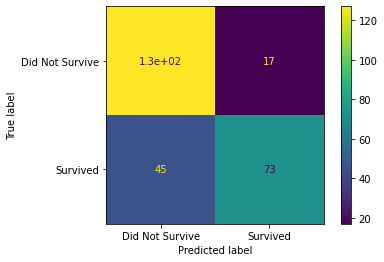

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Did Not Survive', 'Survived'])
disp.plot()
plt.show()

# **Random Forest Comparision**

In [37]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

dclf = tree.DecisionTreeClassifier()
dclf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
ypred = dclf.predict(X_test)

In [39]:
cm = confusion_matrix(y_test, ypred)
print(cm)

[[128  16]
 [ 48  70]]


In [40]:
tn, fp, fn, tp = confusion_matrix(y_test, ypred).ravel()
print('Percent Survivors Correctly Predicted:\t', 100*(tp / (tp + fn)), '%')
print('Percent Fatalities Correctly Predicted:\t', 100*(tn / (tn + fp)), '%')
print('Overall Accuracy:\t\t', 100*accuracy_score(ypred, y_test), '%\n')

Percent Survivors Correctly Predicted:	 59.32203389830508 %
Percent Fatalities Correctly Predicted:	 88.88888888888889 %
Overall Accuracy:		 75.57251908396947 %



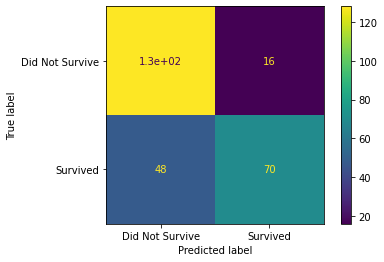

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Did Not Survive', 'Survived'])
disp.plot()
plt.show()

# **Conclusion:** The neural nerwork accuracy is marginal better than random forest.